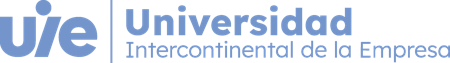

**G25GXX3.10X. Aprendizaje Automático**

**Profesor: Borja González Seoane**

Curso 2025-26

In [1]:
__author__ = "Alex Caride Cid"

In [2]:
# import sys
from pathlib import Path

In [3]:
from pathlib import Path

ARTEFACTOS_PATH = "./artifacts"  # Carpeta donde guardaremos las políticas entrenadas
Path(ARTEFACTOS_PATH).mkdir(exist_ok=True)  # Creamos la carpeta si no existe


In [4]:
# Como el archivo minichess.py está en la misma carpeta que el notebook, 
# no necesitamos modificar el sys.path, importamos directamente

from minichess import (
    JuegoMiniChess,
    JugadorMiniChessHum,
    JugadorMiniChessMaq,
)


In [5]:
n_rondas = 500

# Creamos dos agentes máquina que se enfrentarán entre sí
jugador_maq = JugadorMiniChessMaq(
    nombre="AgenteMaq1",
    tasa_exploracion=0.3,
    tasa_aprendizaje=0.2,
    descuento_gamma=0.9
)

jugador_maq2 = JugadorMiniChessMaq(
    nombre="AgenteMaq2",
    tasa_exploracion=0.3,
    tasa_aprendizaje=0.2,
    descuento_gamma=0.9
)

# Creamos el juego con los dos agentes
juego = JuegoMiniChess(jugador_maq, jugador_maq2)

# Entrenamos durante n_rondas partidas
juego.fit(rondas=n_rondas)


Ronda 0/500

  -----------------------------
0 | T | R |   |   |
  -----------------------------
1 | P |   |   |   |
  -----------------------------
2 |   |   |   | p |
  -----------------------------
3 |   |   | r | t |
  -----------------------------
    0   1   2   3

  -----------------------------
0 | T |   | R |   |
  -----------------------------
1 | P |   |   |   |
  -----------------------------
2 |   |   |   | p |
  -----------------------------
3 |   |   | r | t |
  -----------------------------
    0   1   2   3

  -----------------------------
0 | T |   | R |   |
  -----------------------------
1 | P |   |   | p |
  -----------------------------
2 |   |   |   |   |
  -----------------------------
3 |   |   | r | t |
  -----------------------------
    0   1   2   3

  -----------------------------
0 | T | R |   |   |
  -----------------------------
1 | P |   |   | p |
  -----------------------------
2 |   |   |   |   |
  -----------------------------
3 |   |   | r | t |
  

In [6]:
# Guardamos la política de la máquina entrenada
jugador_maq.guarda_politica(Path(ARTEFACTOS_PATH) / f"minichess_{n_rondas}.yml")


In [7]:
# Entrenamos más rondas para mejorar la política
n_rondas_adicionales = 1000

# Continuamos el entrenamiento (los agentes ya tienen experiencia de las 100 rondas anteriores)
juego.fit(rondas=n_rondas_adicionales)

# Guardamos la política mejorada
n_total = n_rondas + n_rondas_adicionales
jugador_maq.guarda_politica(Path(ARTEFACTOS_PATH) / f"minichess_{n_total}.yml")


Ronda 0/1000

  -----------------------------
0 | T | R |   |   |
  -----------------------------
1 | P |   |   |   |
  -----------------------------
2 |   |   |   | p |
  -----------------------------
3 |   |   | r | t |
  -----------------------------
    0   1   2   3

  -----------------------------
0 | T |   |   |   |
  -----------------------------
1 | P | R |   |   |
  -----------------------------
2 |   |   |   | p |
  -----------------------------
3 |   |   | r | t |
  -----------------------------
    0   1   2   3

  -----------------------------
0 | T |   |   |   |
  -----------------------------
1 | P | R |   |   |
  -----------------------------
2 |   | r |   | p |
  -----------------------------
3 |   |   |   | t |
  -----------------------------
    0   1   2   3

  -----------------------------
0 | T |   |   |   |
  -----------------------------
1 | P |   |   |   |
  -----------------------------
2 |   | R |   | p |
  -----------------------------
3 |   |   |   | t |
 

In [8]:
# Definimos cuál es el archivo con la mejor política entrenada
pesos_mejor_politica = f"minichess_{n_total}.yml"  # La política con más rondas de entrenamiento


In [9]:
# Dos máquinas jugando entre sí mostrando el resultado
jugador_maq_test1 = JugadorMiniChessMaq(
    "Máquina Test 1",
    tasa_exploracion=0.0,
    tasa_aprendizaje=0.0
)
jugador_maq_test1.carga_politica(Path(ARTEFACTOS_PATH) / pesos_mejor_politica)

jugador_maq_test2 = JugadorMiniChessMaq(
    "Máquina Test 2",
    tasa_exploracion=0.0,
    tasa_aprendizaje=0.0
)
jugador_maq_test2.carga_politica(Path(ARTEFACTOS_PATH) / pesos_mejor_politica)

# Creamos un juego entre las dos máquinas
juego_maq_vs_maq = JuegoMiniChess(jugador_maq_test1, jugador_maq_test2)

# Jugamos una partida
juego_maq_vs_maq.jugar()

# Mostramos el resultado manualmente
resultado = juego_maq_vs_maq._JuegoMiniChess__calcula_ganador()
if resultado == 1:
    print(f"\n¡{jugador_maq_test1.name} (Jugador 1) gana!")
elif resultado == -1:
    print(f"\n¡{jugador_maq_test2.name} (Jugador 2) gana!")
else:
    print("\n¡Empate!")



  -----------------------------
0 | T | R |   |   |
  -----------------------------
1 | P |   |   |   |
  -----------------------------
2 |   |   |   | p |
  -----------------------------
3 |   |   | r | t |
  -----------------------------
    0   1   2   3

  -----------------------------
0 | T |   | R |   |
  -----------------------------
1 | P |   |   |   |
  -----------------------------
2 |   |   |   | p |
  -----------------------------
3 |   |   | r | t |
  -----------------------------
    0   1   2   3

  -----------------------------
0 | T |   | R |   |
  -----------------------------
1 | P |   |   |   |
  -----------------------------
2 |   |   | r | p |
  -----------------------------
3 |   |   |   | t |
  -----------------------------
    0   1   2   3

  -----------------------------
0 | T |   |   |   |
  -----------------------------
1 | P | R |   |   |
  -----------------------------
2 |   |   | r | p |
  -----------------------------
3 |   |   |   | t |
  ------------

In [11]:
# Recuperamos la mejor máquina entrenada
jugador_maq1_mejor = JugadorMiniChessMaq(
    "Mejor máquina",
    tasa_exploracion=0.0,  # Sin exploración: solo jugadas óptimas
    tasa_aprendizaje=0.0   # No aprende más durante la partida de prueba
)
jugador_maq1_mejor.carga_politica(Path(ARTEFACTOS_PATH) / pesos_mejor_politica)

# Jugamos contra la máquina entrenada
juego_test = JuegoMiniChess(jugador_maq1_mejor, JugadorMiniChessHum(__author__))
juego_test.jugar()



  -----------------------------
0 | T | R |   |   |
  -----------------------------
1 | P |   |   |   |
  -----------------------------
2 |   |   |   | p |
  -----------------------------
3 |   |   | r | t |
  -----------------------------
    0   1   2   3

  -----------------------------
0 | T |   | R |   |
  -----------------------------
1 | P |   |   |   |
  -----------------------------
2 |   |   |   | p |
  -----------------------------
3 |   |   | r | t |
  -----------------------------
    0   1   2   3

Movimientos válidos disponibles:
  0: Desde (2, 3) hasta (1, 3)
  1: Desde (3, 2) hasta (2, 1)
  2: Desde (3, 2) hasta (2, 2)
  3: Desde (3, 2) hasta (3, 1)

  -----------------------------
0 | T |   | R |   |
  -----------------------------
1 | P |   |   |   |
  -----------------------------
2 |   |   |   | p |
  -----------------------------
3 |   | r |   | t |
  -----------------------------
    0   1   2   3

  -----------------------------
0 | T |   |   |   |
  ----------

En las pruebas realizadas, el agente muestra un comportamiento adecuado al respetar todas las reglas de movimiento y evitar acciones ilegales, lo que valida la correcta integración con el entorno. Sin embargo, el hecho de que haya sido derrotado por un jugador humano en un tiempo breve sugiere que, aunque la función de recompensa guía correctamente sus objetivos básicos, su política actual es aún simple y carece de profundidad estratégica, por lo que se beneficiaría significativamente de un entrenamiento más extenso (mayor número de rondas) para explorar más estados y refinar su toma de decisiones ante adversarios no aleatorios